In [1]:
%config InlineBackend.figure_format = 'svg'

(appendix_02)=

# Appendix 2: Visualizing Atomic Orbitals

```{warning}
This appendix is still being worked, may contain errors, and assumes a future version of SymPy for the `Z_lm()` function. This function has been temporarily defined in a code cell below to privde this feature until the next SymPy release.
```

The visualization of atomic obitals and orbital information is important enough topics in chemistry to warrent specific attention. This appendix focuses on different methods of visualizing various aspects of atomic orbitals and tools to assist in this task. This content is not included in the chapter on plotting with matplotlib because this appendix heavily utilizes various libraries such as SymPy, interact, and NumPy not yet introduced before Chapter 03.

Atomic orbitals are described by a wavefunction, $\Psi (n, l, m)$, which is the product of the radial wavefunction, $R(n, l)$, and the angular wavefunction, $Y(l, m)$. Each atomic orbital has a different wavefunction $\Psi$, but they sometimes share common radial wavefunctions.

$$ \Psi(n, l, m) = R(n, l)Y(l, m) $$

The **radial wavefunction** depends upon the principal (n) and angular ($l$) quantum numbers and provides information about the wavefunction or electron probability at various distances from the nucleus. The radial wavefunction is independant of the direction. The **angular wavefunction** describes the *direction* of the orbital with respect to the spherical coordinate angles and depends upon the angular ($l$) and magnetic ($m$ or $m_l$) quantum numbers. We will first visualize the radial and angular components individually before combining them into a more complete picture of atomic orbitals.

We will use NumPy and matplotlib heavily in this chapter, and we will make heavy use of the SymPy library for convenient functions in its [hydrogen model](https://docs.sympy.org/latest/modules/physics/hydrogen.html). These are all imported below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sympy
from sympy.physics.hydrogen import R_nl, Psi_nlm #, Z_lm

In [3]:
# delete this cell and replace with actual Z_lm after next SymPy release
from sympy.functions.special.spherical_harmonics import Znm
def Z_lm(l, m, phi, theta):
    return Znm(l, m, theta, phi).expand(func=True)


````{margin}
```{note}
The SymPy library is introduced in [Chapter 8](8) and provides mainly tools for symbolic mathematics along with other tools for wavefunctions, harmonic oscillators, biomechanics, etc.
```
````

## Radial Wavefunctions

Because the radial wavefunctions are independant of direction, they can be represented effectively on a simple 2D plot. The toughest part is coding the equations for every combination of n and $l$. The good news is that the SymPy library includes a function, `R_nl()`, in the [Hydrogen Wavefunction](https://docs.sympy.org/latest/modules/physics/hydrogen.html) (`sympy.physics.hydrogen`) module that provides this functionality. This function takes the principle quantum number (n), angular quantum number ($l$), radius in Bohrs (r), and atomic number (Z). A Bohr equals about 52.9 pm.

~~~python
R_nl(n, l, m, r, Z=1)
~~~

We can evaluate the function for any hydrogen-like atomic orbitals such as the 3p orbitals (n = 3 and $l$ = 1) at 4.0 Bohrs.

In [4]:
R_nl(3, 1, 4.0, Z=1)

0.0173561901639985*sqrt(6)

SymPy prefers to return results in exact form, so it includes $\sqrt6$ in this particular result. To get a float answer, use the `evalf()` method

````{margin}
```{note}
The `evalf()` method can take an optional argument for the precision number such as `evalf(5)` for 5 digits of precision.
```
````

In [5]:
R_nl(3, 1, 4.0, Z=1).evalf()

0.0425138097805085

It might now be interesting to evaluate this radial function at a range of distances and plot them. This function does not support taking multiple radii, so you have two options below. 
1) Iterate through a list or array of radii and evaluate this function one radius at a time.
2) Convert the R_nl() function to a function that can accept an array using the `lambdify()` method.

Both approaches are demonstrated below.

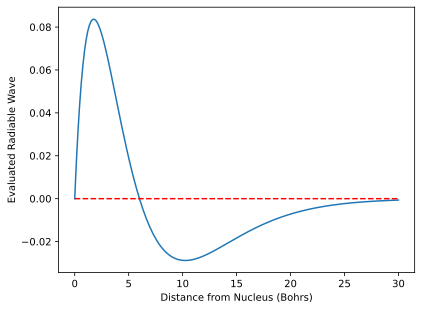

In [6]:
# first approach - interate through iterable
radii = np.linspace(0, 30, 200)
R_eval = [R_nl(3, 1, r, Z=1) for r in radii]

plt.plot(radii, R_eval)
plt.hlines(0, 0, 30, colors='r', linestyles='dashed')
plt.xlabel('Distance from Nucleus (Bohrs)')
plt.ylabel('Evaluated Radiable Wave');

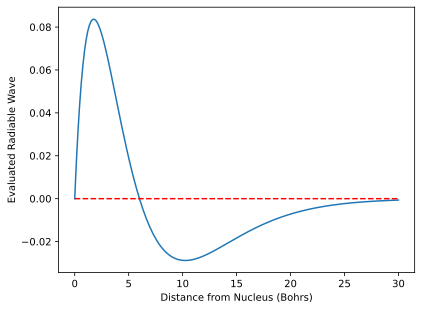

In [7]:
# second approach - lambdify
r = sympy.symbols('r') # create SymPy symbol

# create a numpy compatible function using lambdify
R_3p = sympy.lambdify(r, R_nl(3, 1, r, Z=1), modules='numpy')
radii = np.linspace(0, 30, 200)

plt.plot(radii, R_3p(radii))
plt.hlines(0, 0, 30, colors='r', linestyles='dashed')
plt.xlabel('Distance from Nucleus (Bohrs)')
plt.ylabel('Evaluated Radiable Wave');

The electron **probability density** at any distance can be found by calculating $R^2r^2$, known as the **radial distribution function** where $R$ is the radial wavefunction and $r$ is the distance from the nucleus.

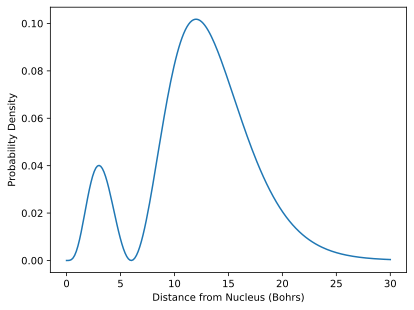

In [8]:
plt.plot(radii, R_3p(radii)**2 * radii**2)
plt.xlabel('Distance from Nucleus (Bohrs)')
plt.ylabel('Probability Density');

The reason we mulitply the square of the radial wavefunction by $r^2$ is to account for greater surface area of a sphere ($A_{sphere} = 4\pi r^2$) the furthur we get from the center. We are effectively carrying out the calculation depicted below. We divide the sphere surface area by 4$\pi$ to normalize the probability over all space to equal one.

Text(0.66, 0.5, '=')

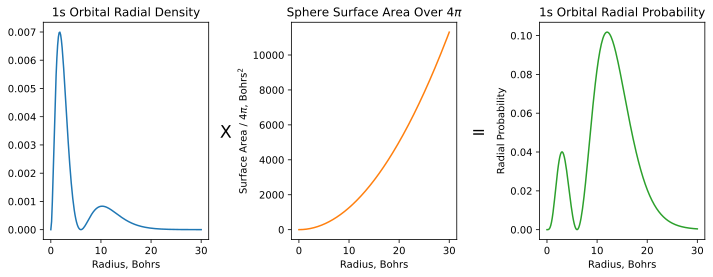

In [23]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(radii, R_3p(radii)**2, color='C0')
ax1.set_xlabel('Radius, Bohrs')
ax1.set_title('1s Orbital Radial Density')

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(radii, 4 * sympy.pi * radii**2, color='C1')
ax2.set_xlabel('Radius, Bohrs')
ax2.set_ylabel('Surface Area / 4$\\pi$, Bohrs$^2$')
ax2.set_title('Sphere Surface Area Over 4$\\pi$')

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(radii, radii**2 * R_3p(radii)**2, color='C2')
ax3.set_xlabel('Radius, Bohrs')
ax3.set_ylabel('Radial Probability')
ax3.set_title('1s Orbital Radial Probability')

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
fig.text(0.31, 0.5, 'X', fontdict={'size': 'xx-large'})
fig.text(0.66, 0.5, '=', fontdict={'size': 'xx-large'})

The probabily $R^2r^2$ can be integrated using the `sympy.integrate()` function which accepts the function or mathematical expression to be integrated and a tuple that contains the variable, the min, and the max values. For example, we can integrate the `R_nl()` for the 2s orbital from 0 to 3.0 Bohrs like below.

~~~python
sympy.integrate(f(x), (x, min, max))
~~~

In [10]:
sympy.integrate(R_nl(2, 0, r, Z=1), (r, 0, 3.0)).evalf()

0.473330547984585

Let's test that the radial distribution is normalized by integrating from zero to infinity.

````{margin}
```{note}
The `sympy.oo` is the SymPy variable for infinity.
```
````

In [11]:
sympy.integrate(R_nl(2, 0, r, Z=1)**2 * r**2, (r, 0, sympy.oo)).evalf()

1.00000000000000

## Angular Wavefunctions

The other component of $\Psi$ is the angular wavefunctions which provides directional information about an orbital. The angular equations can be coded by hand or we can also use the `Y_lm()` or `Z_lm()` spherical harmonics wavefunctions from `sympy.physics.hydrogen` to assist us. The difference between these two functions is that `Y_lm()` may return a complex expression whereas `Z_lm()` will return the real-valued angular wavefunction. Because our goal is to visualize the wavefunctions, we will restrict outselves to the latter here. The angular wavefunction provides information in all directions, so we will plot this information in 3D. 

```{warning}
The plot of angular wavefunction does not include the radial information so does not fully describe the shape of atomic orbitals. Please do not interpret the angular plots below as the actual shape of atomic orbitals even though they resemble them.
```

There are multiple conventions for spherical coordinates. We will use the SciPy/SymPy convention of using theta ($\theta$) for the azmuthal (i.e., direction on *xy*-plane) and phi ($\phi$) as the polar angle (i.e., angle from the positive *z*-axis) for plotting the angular wavefunctions. Below, we plot the $d_{z^2}$ orbital by coding the [angular wavefunction expresion](https://en.wikipedia.org/wiki/Table_of_spherical_harmonics#Real_spherical_harmonics) by hand. 

```{tip}
See [section 3.6.3](3.6.3) for guidance on plotting surfaces in 3D.
```

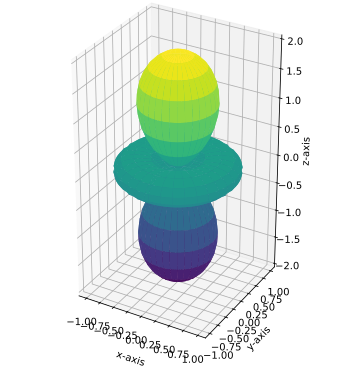

In [12]:
# generate mesh grid of theta and phi values
theta, phi = np.meshgrid(np.linspace(0, np.pi, 51),
                         np.linspace(0, 2 * np.pi, 101))

# convert angles to xyz values of a sphere, r = 1
x = np.sin(theta) * np.sin(phi)
y = np.sin(theta) * np.cos(phi)
z = np.cos(theta)

# multiply xyz values by angular wavefunction
dz2 = np.sqrt((5 / 16) * np.pi) * (3 * np.cos(theta)**2 - 1)
X, Y, Z = x * dz2, y * dz2, z * dz2

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_aspect('equal') # sets aspect ratio to equal

Alternatively, we can use the `Z_lm()` function from `sympy.physics.hydrogen` to generate the angular wavefunction based on the angular and magnetic quantum numbers.

~~~python
Z_lm(l, m, phi, theta)
~~~

SymPy functions cannot calculate wavefunctions for an array of angles like NumPy functions can, but fortunately SymPy functions can be converted to NumPy function using the `lambdify()` method. Just provide the `lambdify()` method with a collection of argument variables for the wavefunction as SymPy symbols, the wavefunction, and `modules='numpy'`, and it returns a new function.

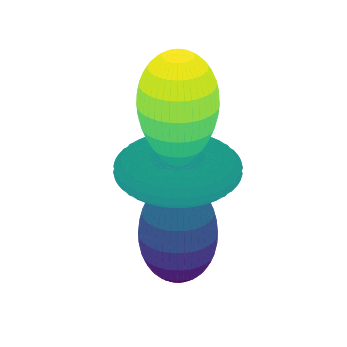

In [13]:
# from sympy.physics import Z_lm

theta, phi = np.meshgrid(np.linspace(0, np.pi, 51),
                         np.linspace(0, 2*np.pi, 101))

x = np.sin(theta) * np.sin(phi)
y = np.sin(theta) * np.cos(phi)
z = np.cos(theta)

# create a numpy function
p, t = sympy.symbols('p t')
f = sympy.lambdify((p, t), Z_lm(2, 0, p, t), modules='numpy')

# multiply xyz values by wave angular wavefunction
f_pt = f(phi, theta)
X, Y, Z = x * f_pt, y * f_pt, z * f_pt

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_aspect('equal') # sets aspect ratio to equal
ax.set_axis_off() # turns off axes and background

We can also visualize the angular component of wavefunctions in 2D using a [polar plot](3.2.4), but we can only visualize one angle at a time. Below we will visualize theta and leave phi fixed. Because we are only visualizing in 2D and not sweeping around the phi angles, we need to make theta go from 0 $\rightarrow$ 2$\pi$.

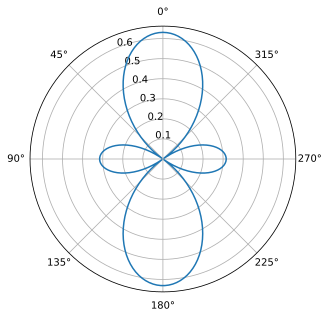

In [14]:
l, m = 2, 0
azmuth, polar = sympy.symbols('azmuth polar')
f = sympy.lambdify((polar, azmuth), Z_lm(l, m, polar, azmuth), modules='numpy')

th = np.linspace(0, 2 * np.pi, 200)
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(th, np.abs(f(0, th)))
# orient 0 degrees to up/north
ax.set_theta_zero_location('N');

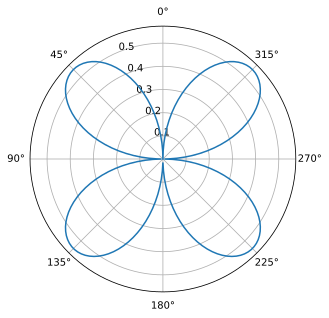

In [15]:
l, m = 2, 1
azmuth, polar = sympy.symbols('azmuth polar')
f = sympy.lambdify((polar, azmuth), Z_lm(l, m, polar, azmuth), modules='numpy')

th = np.linspace(0, 2 * np.pi, 200)
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(th, np.abs(f(0, th)))
# orient 0 degrees to up/north
ax.set_theta_zero_location('N');

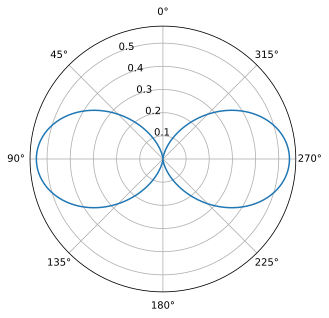

In [16]:
l, m = 2, 2
azmuth, polar = sympy.symbols('azmuth polar')
f = sympy.lambdify((polar, azmuth), Z_lm(l, m, polar, azmuth), modules='numpy')

th = np.linspace(0, 2 * np.pi, 200)
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(th, np.abs(f(0, th)))
# orient 0 degrees to up/north
ax.set_theta_zero_location('N');

The last orbital image is a *d*-orbital viewed from the side.

## Entire Wavefunction - $\Psi$

Now we will visualize both angular and radial components together ($\Psi$) which is again the product of the radial, $R(n, l)$ and angular, $Y(l, m)$ wavefunctions.

$$ \Psi(n, l, m) = R(n, l)Y(l, m) $$

To obtain the entire wavefunction, $\Psi$, we can either multiply the radial and angular wavefunctions from the previous sections or use the SymPy `Psi_nlm()` function which makes this task a little more convenient. Orbitals technicaly have no edge, so there are multiple ways of representing orbitals including contour plots, isosurfaces, 90% surface plots, scatter plots, and translucent 3D plots. We will demonstrate the scatter and contour plots below.

First, let's take a look at the `Psi_nlm()` function which operates similarily to the other SymPy wavefunctions above. 

In [17]:
azmuth, polar, r = sympy.symbols('azmuth polar r')
wf = Psi_nlm(2, 1, 0, r, azmuth, polar)
f = sympy.lambdify((r, azmuth, polar), wf * sympy.conjugate(wf), modules='numpy')

# integrate normalized wavefunction over all area
sympy.integrate(Psi_nlm(3, 1, 0, r, azmuth, polar)**2 * r**2 * sympy.sin(polar), 
                (r, 0, sympy.oo), 
                (azmuth, 0, 2 * sympy.pi), 
                (polar, 0, sympy.pi))

1

Above, we integrate it over all space returning 1 which tells us that this function is normalized when we include $r^2sin(\theta)$.

Now let's visualize an orbital using a scatter plot. We will use a strategy previously reported in [*J. Chem. Educ.,* **1990,** 67, 42-44](https://doi.org/10.1021/ed067p42) which includes the following steps.
1. Use a random number generator to produce a series of *xyz* or *xy* values depending upon dimensions
2. Use the *xyz* or *xy* values above to calculate the $\theta$, $r$, and $\phi$ values - \$phi$ is only necceary if we are using *xyz*
   
3. Use the above radius and angles to calculate probabilities using the wavefunction
4. Normalize the probabilities by dividing by the maximum probability value across all the data points
5. If each normalized probability is above a random value from 0 $\rightarrow$ 1, it gets included in the scatter plot

````{margin}
```{tip}
If plotting a *very* large number of data points, consider using `plt.plot()` instead of `plt.scatter()` because the latter is slower and uses more memory due to its ability to individualize each marker in the plot.
```
````

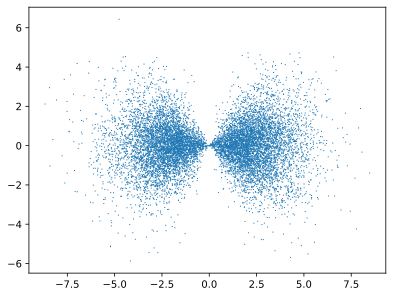

In [18]:
# 2p orbital

# create wavefunction as python function
azmuth, polar, r = sympy.symbols('azmuth polar r')
wf = Psi_nlm(2, 1, 0, r, azmuth, polar)
f = sympy.lambdify((r, azmuth, polar), wf * sympy.conjugate(wf), modules='numpy')

# generate random coordinates
rng = np.random.default_rng()
n_points = 1000000
rand = 20 * rng.random(size=(n_points, 3)) - 10
x, y, z = rand[:, 0], rand[:, 1], rand[:, 2]
polar = np.arctan(y / x)
r = np.sqrt(x**2 + y**2 + z**2)
azmuth = np.arccos(z / r)

# normalize and create mask
prob = np.abs(f(r, azmuth, polar))**2
norm_prob = prob / prob.max()
mask = norm_prob > rng.random(n_points)

plt.plot(x[mask], y[mask], ',');

The plot above makes the shape of the orbital look like the orbital lobes are almost conical, which is not what we typcially see in realistic orbital shape figures. This is an illusion because there are more data points visualized along the horizontal axis due to the orbital being thicker there. If we instead reduce the simulation to 2D (i.e., only *xy* plane), the orbital lobes appear rounder because we are visualizing a slice through the middle of the orbital.

In [19]:
# 2p oribtal

# create wavefunction as python function
azmuth, polar, r = sympy.symbols('azmuth polar r')
psi = Psi_nlm(2, 1, 0, r, 0, polar)
psi_f = sympy.lambdify((r, polar), psi * sympy.conjugate(psi), modules='numpy')

# generate random coordinates
rng = np.random.default_rng()
n_points = 1000000
rand = 20 * rng.random(size=(n_points, 2)) - 10
x, y = rand[:, 0], rand[:, 1]
polar = np.arctan(y / x)
r = np.sqrt(x**2 + y**2)

# normalize and create mask
wf = psi_f(r, polar)
prob = wf**2
norm_prob = prob / prob.max()

mask = norm_prob > rng.random(n_points)
plt.plot(x[mask], y[mask], ',');

We can visualize larger orbitals to see more nodes such as in the 3p orbital below.

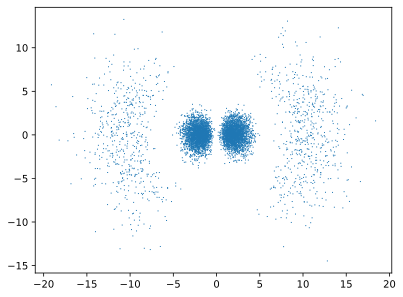

In [20]:
# 3p orbital

# create wavefunction as python function
azmuth, polar, r = sympy.symbols('azmuth polar r')
psi = Psi_nlm(3, 1, 0, r, 0, polar)
psi_f = sympy.lambdify((r, polar), psi * sympy.conjugate(psi), modules='numpy')

# generate random coordinates
rng = np.random.default_rng()
n_points = 1000000
rand = 40 * rng.random(size=(n_points, 2)) - 20
x, y = rand[:, 0], rand[:, 1]
polar = np.arctan(y / x)
r = np.sqrt(x**2 + y**2)

# normalize and create mask
wf = psi_f(r, polar)
prob = wf**2
norm_prob = prob / prob.max()

mask = norm_prob > rng.random(n_points)
plt.plot(x[mask], y[mask], ',');

A second way to visualize orbitals is through a contour plot. Here we calculate the probability in a mesh of locations and provide the `plt.countour()` function with the locations and probabilities.

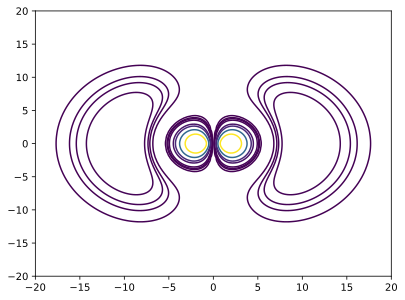

In [21]:
X, Y = np.meshgrid(np.linspace(-20, 20, 200),
                   np.linspace(-20, 20, 200))

# create wavefunction as python function
azmuth, polar, r = sympy.symbols('azmuth polar r')
wf = Psi_nlm(3, 1, 0, r, 0, polar)
f = sympy.lambdify((r, polar), wf * sympy.conjugate(wf), modules='numpy')
polar = np.arctan(Y / X)
r = np.sqrt(X**2 + Y**2)

# calculate probability
prob = np.abs(f(r, polar))**2

plt.contour(X, Y, prob, levels=[1e-9, 3e-9, 5e-9, 1e-8, 5e-8, 1e-7, 3e-7, 9e-7]);

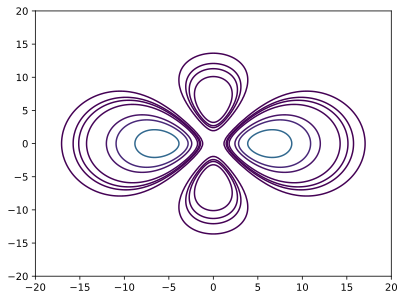

In [22]:
X, Y = np.meshgrid(np.linspace(-20, 20, 200),
                   np.linspace(-20, 20, 200))

# create wavefunction as python function
azmuth, polar, r = sympy.symbols('azmuth polar r')
wf = Psi_nlm(3, 2, 0, r, 0, polar)
f = sympy.lambdify((r, polar), wf * sympy.conjugate(wf), modules='numpy')
polar = np.arctan(Y / X)
r = np.sqrt(X**2 + Y**2)

# calculate probability
prob = np.abs(f(r, polar))**2

plt.contour(X, Y, prob, levels=[1e-9, 3e-9, 5e-9, 1e-8, 5e-8, 1e-7, 3e-7, 9e-7]);